In [32]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from statistics import mean

from scipy.optimize import curve_fit

# Set Helvetica as the default font
mpl.rcParams['font.family'] = 'Helvetica'

(5000, 1, 100, 0.1)


/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:28: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:28: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:28: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:34: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(sigmoid, x_data, data[plasmids[i]], initParam, maxfev=10000)


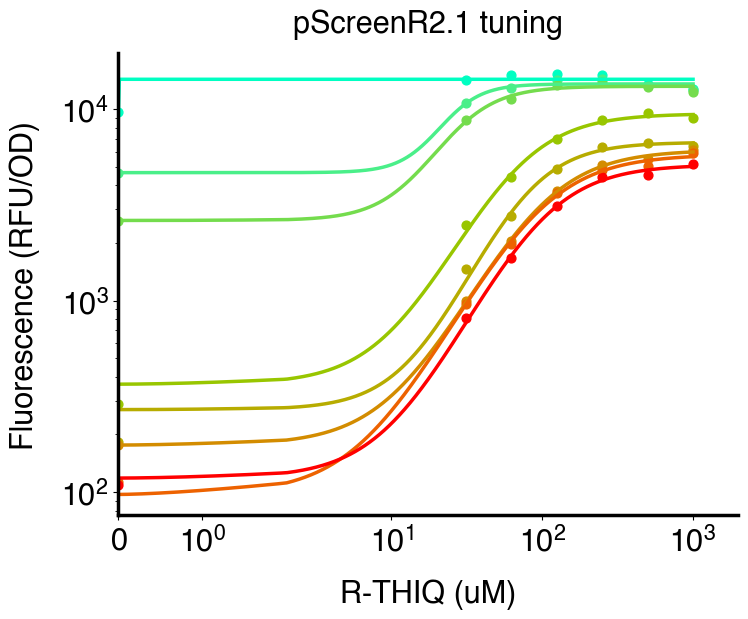

saved figure to ../SVG/pScreenR2.1_tuning_RFU.svg


In [84]:
# load data
with open("../Data/pScreenR2.1_Tuning.xlsx", 'rb') as f:
    data = pd.read_excel(f)

# set x-axis ligand concentrations
x_data = [float(i) for i in data["Name"].values]

plasmids = ["RFU_P1-R2.1", "RFU_P10-R2.1", "RFU_P50-R2.1", "RFU_P150-R2.1", "RFU_P250-R2.1", "RFU_P500-R2.1", "RFU_P750-R2.1", "RFU_P1000-R2.1"]
colors = ["#ff6666","#ea5856","#ea5856","#c13d39","#ac302b","#99221e","#851311","#720000"]
colors = ["#0008ff","#8a00d1","#ae00a6","#c4008b","#d60074","#e7005d","#f70040","#ff0000"]
colors = ["#00ffc2","#4aef89","#74dc4d","#98c600","#b7ac00","#d38c00","#ed6200","#ff0000"]

#create plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# define initial parameters. THIS IS ALWAYS TRIAL AND ERROR!
initParam = (5000, 1, 100, 0.1)
print(initParam)

# create xaxis for curvefit
xaxis_max = 2000
x = np.linspace(1e-8,(xaxis_max/2),100000)

#Hill sigmoid function
def sigmoid(x, a, b, c, d):
        return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))

y = data[plasmids[6]]

# plot line
for i in range(0,len(plasmids)):
    popt, pcov = curve_fit(sigmoid, x_data, data[plasmids[i]], initParam, maxfev=10000)
    plt.plot(x, sigmoid(x, *popt), label='fit', lw=2.5, color=colors[i])
    # plot dots
    plt.scatter(x_data, data[plasmids[i]], s=40, color=colors[i])

# set plot style
plt.title("pScreenR2.1 tuning", fontsize=22, pad=15)
plt.xlabel("R-THIQ (uM)", fontsize=22, labelpad=15)
plt.ylabel("Fluorescence (RFU/OD)", fontsize=22, labelpad=15)
plt.yticks(size=22)
plt.xticks(size=22)
ax.set_yscale("log")
ax.set_xscale("symlog")
ax.set_xlim(0,2000)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

save_name = "../SVG/pScreenR2.1_tuning_RFU.svg"
plt.savefig(save_name, format="svg")
plt.show()
print("saved figure to "+ save_name)

(5000, 10, 100, 0.1)


/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:28: RuntimeWarning: divide by zero encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:28: RuntimeWarning: invalid value encountered in power
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))
/var/folders/s4/1zbdf0sn3nz0djbwvkr5q_km0000gn/T/ipykernel_18807/4086406533.py:28: RuntimeWarning: invalid value encountered in divide
  return d + (a-d) * np.power(x,b) / (np.power(c,b) + np.power(x,b))


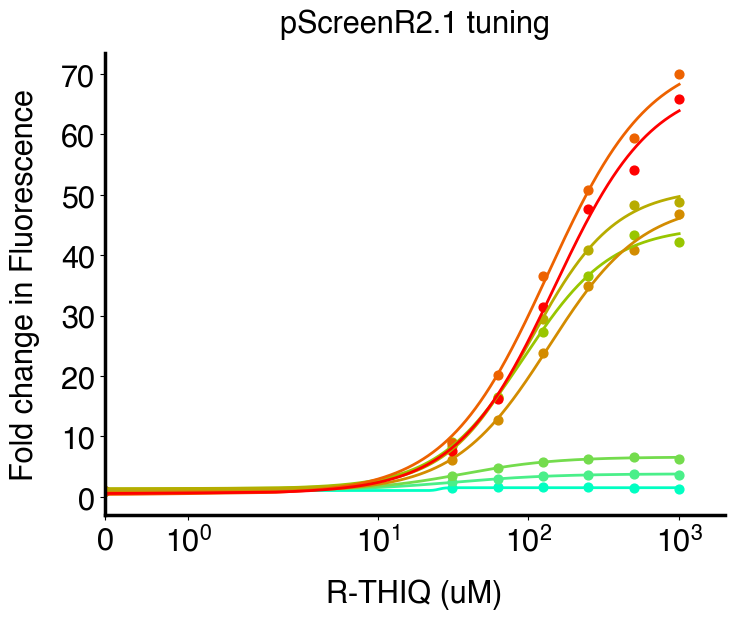

saved figure to ../SVG/pScreenR2.1_tuning_Fold.svg


In [85]:

plasmids = ["Fold-change_P1", "Fold-change_P10", "Fold-change_P50", "Fold-change_P150", "Fold-change_P250", "Fold-change_P500", "Fold-change_P750", "Fold-change_P1000"]


#create plots
fig, ax = plt.subplots(figsize=(8, 6))
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)

# define initial parameters. THIS IS ALWAYS TRIAL AND ERROR!
initParam = (5000, 10, 100, 0.1)
print(initParam)

# create xaxis for curvefit
xaxis_max = 2000
x = np.linspace(1e-8,(xaxis_max/2),100000)


# plot line
for i in range(0,len(plasmids)):
    popt, pcov = curve_fit(sigmoid, x_data, data[plasmids[i]], initParam, maxfev=10000)
    plt.plot(x, sigmoid(x, *popt), label='fit', lw=2, color=colors[i])
    # plot dots
    plt.scatter(x_data, data[plasmids[i]], s=40, color=colors[i])

# set plot style
plt.title("pScreenR2.1 tuning", fontsize=22, pad=15)
plt.xlabel("R-THIQ (uM)", fontsize=22, labelpad=15)
plt.ylabel("Fold change in Fluorescence", fontsize=22, labelpad=15)
plt.yticks(size=22)
plt.xticks(size=22)
ax.set_xscale("symlog")
ax.set_xlim(0,2000)
# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

save_name = "../SVG/pScreenR2.1_tuning_Fold.svg"
plt.savefig(save_name, format="svg")
plt.show()
print("saved figure to "+ save_name)